In [1]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn

In [2]:
def get_input_numbers():
    v = raw_input('Please enter a set of numbers: ')
    if ", " in v:
        arr = v.split(', ')
    elif "," in v:
        arr = v.split(',')
    else:
        arr = v.split(' ')
    ints = [int(a) for a in arr]
    return np.array(ints)

In [3]:
def in_hyp(hyp, val):
    switcher = {
        "even": lambda x: x % 2 == 0, 
        "odd": lambda x: x % 2 == 1, 
        "squares": lambda x: x == 1 or x == 4 or x == 9 or x == 16 or x == 25 or x == 36 or x == 49 or x == 64 or x == 81 or x == 100, 
        
        "mult of 3": lambda x: x % 3 == 0, 
        "mult of 4": lambda x: x % 4 == 0, 
        "mult of 5": lambda x: x % 5 == 0,
        "mult of 6": lambda x: x % 6 == 0, 
        "mult of 7": lambda x: x % 7 == 0, 
        "mult of 8": lambda x: x % 8 == 0,  
        "mult of 9": lambda x: x % 9 == 0, 
        "mult of 10": lambda x: x % 10 == 0, 
            
        "ends in 1": lambda x: x % 10 == 1, 
        "ends in 2": lambda x: x % 10 == 2, 
        "ends in 3": lambda x: x % 10 == 3, 
        "ends in 4": lambda x: x % 10 == 4, 
        "ends in 5": lambda x: x % 10 == 5,
        "ends in 6": lambda x: x % 10 == 6, 
        "ends in 7": lambda x: x % 10 == 7, 
        "ends in 8": lambda x: x % 10 == 8, 
        "ends in 9": lambda x: x % 10 == 9, 
        
        "powers of 2": lambda x: x == 2 or x == 4 or x == 8 or x == 16 or x == 32 or x == 64,
        "powers of 3": lambda x: x == 3 or x == 9 or x == 27 or x == 81, 
        "powers of 4": lambda x: x == 4 or x == 16 or x == 64, 
        "powers of 5": lambda x: x == 5 or x == 25, 
        "powers of 6": lambda x: x == 6 or x == 36, 
        "powers of 7": lambda x: x == 7 or x == 49,
        "powers of 8": lambda x: x == 8 or x == 64, 
        "powers of 9": lambda x: x == 9 or x == 81, 
        "powers of 10": lambda x: x == 10 or x == 100, 
        
        "all": lambda x: True, 
        "powers of 2 + {37}": lambda x: x == 2 or x == 4 or x == 8 or x == 16 or x == 32 or x == 64 or x == 37, 
        "powers of 2 - {32}": lambda x: x == 2 or x == 4 or x == 8 or x == 16 or x == 64,
    }
    
    func = switcher.get(hyp, lambda x: False)
    return func(val)

print in_hyp("powers of 3", 9)

True


In [4]:
concepts = np.array(["even", "odd", "squares", "mult of 3", "mult of 4", "mult of 5", 
            "mult of 6", "mult of 7", "mult of 8",  "mult of 9", "mult of 10", 
            "ends in 1", "ends in 2", "ends in 3", "ends in 4", "ends in 5",
            "ends in 6", "ends in 7", "ends in 8", "ends in 9", "powers of 2",
            "powers of 3", "powers of 4", "powers of 5", "powers of 6", "powers of 7",
            "powers of 8", "powers of 9", "powers of 10", "all", 
            "powers of 2 + {37}", "powers of 2 - {32}"])
print concepts

['even' 'odd' 'squares' 'mult of 3' 'mult of 4' 'mult of 5' 'mult of 6'
 'mult of 7' 'mult of 8' 'mult of 9' 'mult of 10' 'ends in 1' 'ends in 2'
 'ends in 3' 'ends in 4' 'ends in 5' 'ends in 6' 'ends in 7' 'ends in 8'
 'ends in 9' 'powers of 2' 'powers of 3' 'powers of 4' 'powers of 5'
 'powers of 6' 'powers of 7' 'powers of 8' 'powers of 9' 'powers of 10'
 'all' 'powers of 2 + {37}' 'powers of 2 - {32}']


In [5]:
data_over_hyp = np.zeros((len(concepts), 100))
for i, hyp in enumerate(concepts):
    for val in xrange(100):
        if in_hyp(hyp, val + 1):
            data_over_hyp[i,val] = 1

In [6]:
prior = np.ones(len(concepts))
prior[0] = 5
prior[1] = 5
prior[30] = .01
prior[31] = .01
prior = prior / np.sum(prior)
print prior

# divisor is 1/size(H) where H is an element of concepts.  This is used for computing the likelihood later on
divisor = np.array([1 / np.sum(data_over_hyp[i]) for i in xrange(len(concepts))])
print divisor

[ 0.13150973  0.13150973  0.02630195  0.02630195  0.02630195  0.02630195
  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195
  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195
  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195
  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195
  0.00026302  0.00026302]
[ 0.02        0.02        0.1         0.03030303  0.04        0.05        0.0625
  0.07142857  0.08333333  0.09090909  0.1         0.1         0.1         0.1
  0.1         0.1         0.1         0.1         0.1         0.1
  0.16666667  0.25        0.33333333  0.5         0.5         0.5         0.5
  0.5         0.5         0.01        0.14285714  0.2       ]


In [7]:
values = get_input_numbers()

Please enter a set of numbers: 16


In [8]:
# Get the likelihood for the input values from the data_over_hyp matrix
temp = np.array([data_over_hyp[:,val - 1] for val in values])

sum = np.zeros((len(concepts)))
for row in temp:
    sum += row

max = np.max(sum)
sum = map(lambda x: 0 if x != max else x, sum)

# print sum

sum = [math.pow(divisor[i], sum[i]) for i in range(len(sum))]
likelihood = np.array(map(lambda x: 0 if x == 1.0 else x, sum))

print likelihood

[ 0.02        0.          0.1         0.          0.04        0.          0.
  0.          0.08333333  0.          0.          0.          0.          0.
  0.          0.          0.1         0.          0.          0.
  0.16666667  0.          0.33333333  0.          0.          0.          0.
  0.          0.          0.01        0.14285714  0.2       ]


In [9]:
# Get the posterior by multiplying the prior and the likelihood
posterior = np.multiply(likelihood, prior.reshape(len(concepts)))
# print posterior

# Normalize the posterior
posterior = posterior / np.sum(posterior)
print posterior

[ 0.10675071  0.          0.10675071  0.          0.04270028  0.          0.
  0.          0.08895893  0.          0.          0.          0.          0.
  0.          0.          0.10675071  0.          0.          0.
  0.17791785  0.          0.35583571  0.          0.          0.          0.
  0.          0.          0.01067507  0.00152501  0.00213501]


In [10]:
predictive = np.dot(posterior, data_over_hyp)
print predictive

[ 0.11742578  0.29900366  0.01067507  0.80429036  0.01067507  0.22417649
  0.01067507  0.43066287  0.11742578  0.11742578  0.01067507  0.16012607
  0.01067507  0.11742578  0.01067507  1.          0.01067507  0.11742578
  0.01067507  0.16012607  0.01067507  0.11742578  0.01067507  0.24908499
  0.11742578  0.22417649  0.01067507  0.16012607  0.01067507  0.11742578
  0.01067507  0.42852786  0.01067507  0.11742578  0.01067507  0.37362749
  0.01220008  0.11742578  0.01067507  0.24908499  0.01067507  0.11742578
  0.01067507  0.16012607  0.01067507  0.22417649  0.01067507  0.24908499
  0.11742578  0.11742578  0.01067507  0.16012607  0.01067507  0.11742578
  0.01067507  0.35583571  0.01067507  0.11742578  0.01067507  0.16012607
  0.01067507  0.11742578  0.01067507  0.89324929  0.01067507  0.22417649
  0.01067507  0.16012607  0.01067507  0.11742578  0.01067507  0.24908499
  0.01067507  0.11742578  0.01067507  0.26687678  0.01067507  0.11742578
  0.01067507  0.24908499  0.11742578  0.11742578  0

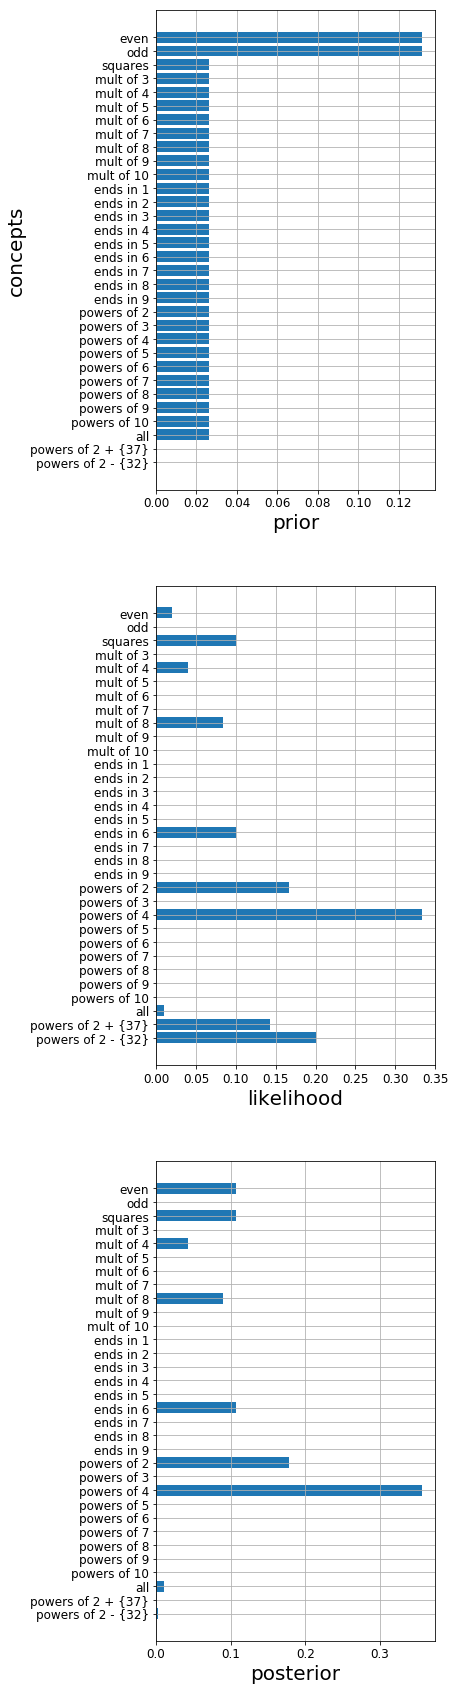

In [11]:
fig = plt.figure()

fig, ax_lst = plt.subplots(3, 1, figsize=(5, 30))

y_pos = np.arange(len(concepts))

ax_lst[0].barh(y_pos, prior)
ax_lst[0].set_xlabel("prior", fontsize=20)
ax_lst[0].set_ylabel("concepts", fontsize=20)
ax_lst[0].tick_params(labelsize=12, zorder=0)
ax_lst[0].set_yticks(y_pos)
ax_lst[0].set_yticklabels(concepts)
ax_lst[0].invert_yaxis()
ax_lst[0].grid(True)

ax_lst[1].barh(y_pos, likelihood)
ax_lst[1].set_xlabel("likelihood", fontsize=20)
ax_lst[1].tick_params(labelsize=12)
ax_lst[1].set_yticks(y_pos)
ax_lst[1].set_yticklabels(concepts)
ax_lst[1].invert_yaxis()
ax_lst[1].grid(True)

ax_lst[2].barh(y_pos, posterior)
ax_lst[2].set_xlabel("posterior", fontsize=20)
ax_lst[2].tick_params(labelsize=12)
ax_lst[2].set_yticks(y_pos)
ax_lst[2].set_yticklabels(concepts)
ax_lst[2].invert_yaxis()
ax_lst[2].grid(True)

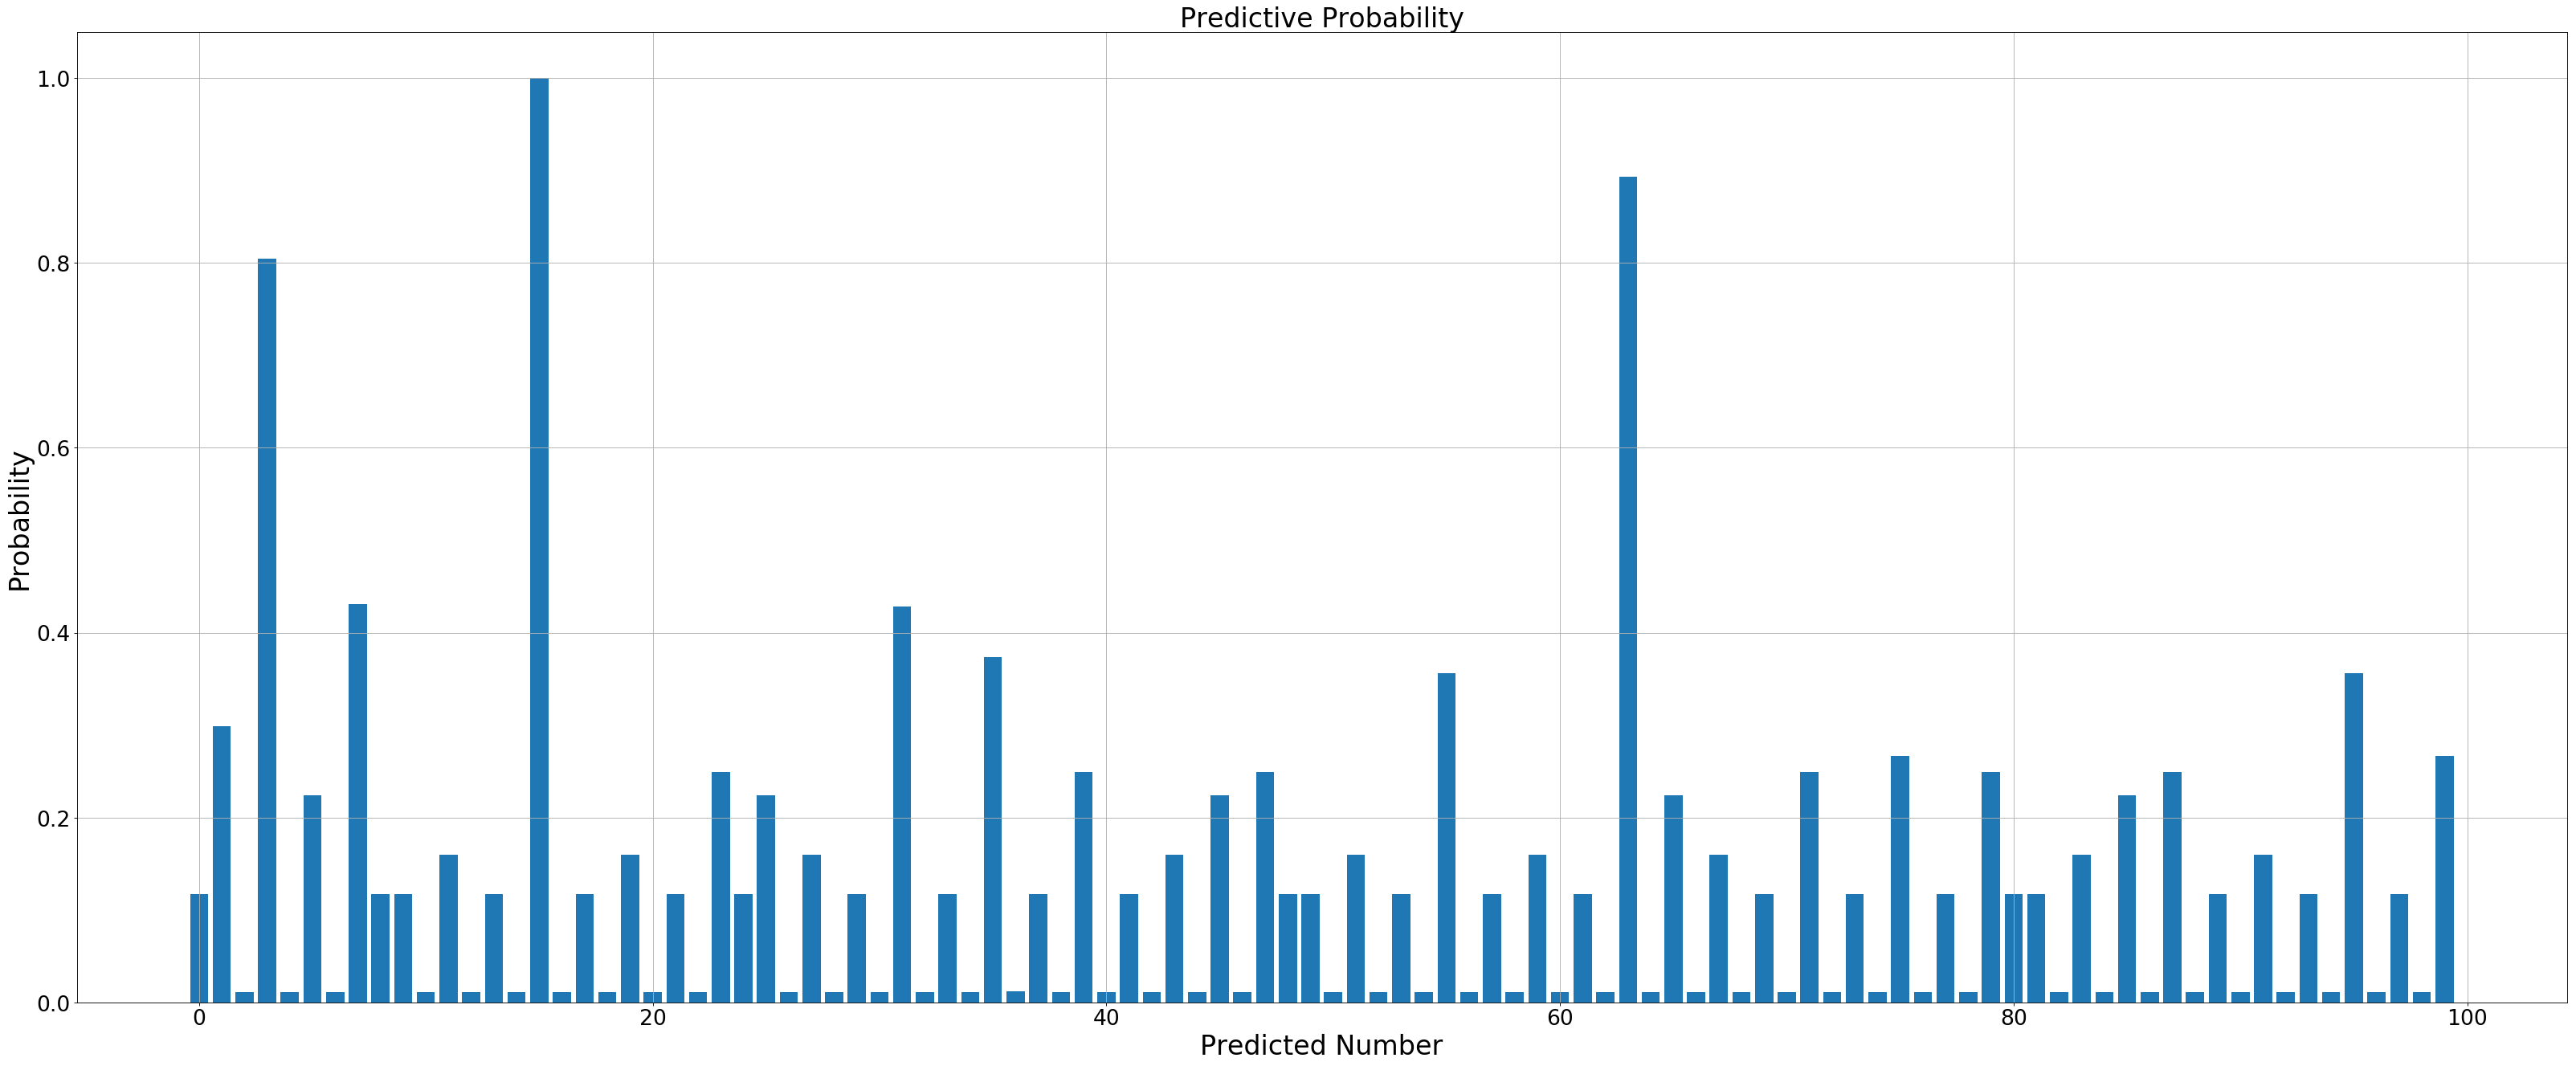

In [12]:
fig = plt.figure(figsize=(50, 20), dpi=80)

y = np.arange(0, 100, 1)

plt.bar(y, predictive)

plt.title('Predictive Probability', fontsize=30)

plt.ylabel('Probability', fontsize=30)
plt.tick_params(labelsize=24)
plt.xlabel('Predicted Number', fontsize=30)

plt.grid(True)
plt.show()